In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("statcast.csv"
                  , usecols = ["player_id"
                               , "player_name"
                               , "xba"
                               , "hits"
                               , "abs"])
data.head()

,player_id,player_name,xba,hits,abs
0,572033,Josh Phegley,NaN,0.0,1.0
1,596129,Daniel Vogelbach,NaN,0.0,0.0
2,664238,Dylan Moore,NaN,0.0,0.0
3,429665,Edwin Encarnacion,NaN,0.0,3.0
4,543257,Robbie Grossman,0.912,1.0,1.0


In [3]:
data["G"] = 1
data["xH"] = data["xba"] * data["abs"]
data["xHG"] = np.where(data["xH"] >= 1, 1, 0)
data["HG"] = np.where(data["hits"] != 0, 1, 0)
data.head()

,player_id,player_name,xba,hits,abs,G,xH,xHG,HG
0,572033,Josh Phegley,NaN,0.0,1.0,1,NaN,0,0
1,596129,Daniel Vogelbach,NaN,0.0,0.0,1,NaN,0,0
2,664238,Dylan Moore,NaN,0.0,0.0,1,NaN,0,0
3,429665,Edwin Encarnacion,NaN,0.0,3.0,1,NaN,0,0
4,543257,Robbie Grossman,0.912,1.0,1.0,1,0.912,0,1


In [4]:
hit_pct = data.groupby(["player_id", "player_name"]).sum()
hit_pct["xPCT"] = hit_pct["xHG"] / hit_pct["G"] * 100
hit_pct["PCT"] = hit_pct["HG"] / hit_pct["G"] * 100
hit_pct = hit_pct.groupby(["player_id", "player_name"]).sum().round(1)
hit_pct.reset_index(inplace = True)
hit_pct.head()

,player_id,player_name,xba,hits,abs,G,xH,xHG,HG,xPCT,PCT
0,282332,CC Sabathia,0.5,0.0,3.0,2,0.5,0,0,0.0,0.0
1,400085,Ichiro Suzuki,0.0,0.0,5.0,2,0.1,0,0,0.0,0.0
2,405395,Albert Pujols,31.6,120.0,491.0,131,124.4,55,79,42.0,60.3
3,408234,Miguel Cabrera,35.7,139.0,493.0,134,134.8,57,89,42.5,66.4
4,425772,Jeff Mathis,11.7,36.0,228.0,75,37.8,15,31,20.0,41.3


In [5]:
full = hit_pct
full["image"] = '<img src="https://securea.mlb.com/mlb/images/players/head_shot/' + full["player_id"].astype(str) + '.jpg" width="40"/>'
full.set_index("player_id", inplace = True)
full = full.loc[:, ['image', 'player_name', 'G', 'abs', 'hits', 'xH', 'xHG', 'HG', 'xPCT', 'PCT']]
full.sort_values(["xHG", "HG"], ascending = False, inplace = True)
full["abs"] = full["abs"].astype(int)
full["hits"] = full["hits"].astype(int)
full["xH"] = full["xH"].astype(int)
HTML(full.head(20).to_html(escape=False))

,image,player_name,G,abs,hits,xH,xHG,HG,xPCT,PCT
player_id,,,,,,,,,,
593160,,Whit Merrifield,159,681,206,196,96,126,60.4,79.2
518934,,DJ LeMahieu,141,602,197,194,94,114,66.7,80.9
645277,,Ozzie Albies,159,640,189,186,92,111,57.9,69.8
543760,,Marcus Semien,161,657,187,180,91,119,56.5,73.9
543685,,Anthony Rendon,143,545,174,173,91,105,63.6,73.4
642708,,Amed Rosario,155,616,177,179,89,114,57.4,73.5
605141,,Mookie Betts,146,597,176,186,89,107,61.0,73.3
646240,,Rafael Devers,153,647,201,190,87,115,56.9,75.2
592206,,Nicholas Castellanos,148,615,178,174,86,114,58.1,77.0


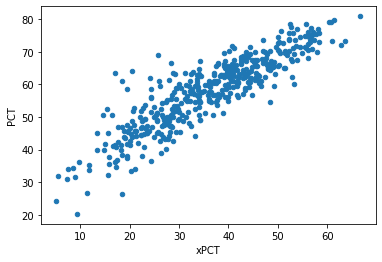

In [6]:
graphable = full.loc[full['abs'] >= 100]
graphable.plot.scatter(x = 'xPCT', y = 'PCT')